# Pymysql with Scraping

In this page, I will connect Mysql on localhost and scraping data from website. It has reference : https://howpcrules.com/

My goal in this page is finding the specific elements in web site and and parse it. Next is saving data to Mysql local server and finally I will read it again with pandas.

In [15]:
import pymysql
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import Image

In [2]:
#  Web site source url
url = 'https://howpcrules.com/sample-page-for-web-scraping/'

# Load html's plain data into a variable
# requests is html communication library
plain_html_text = requests.get(url)

In [3]:
print(plain_html_text.url)
#print(plain_html_text.text)

https://howpcrules.com/sample-page-for-web-scraping/


## 1. Store data to Mysql local server

In this reference web site has  “<!– Start Sample Data to be Scraped –>” html comment. It is data that I would start.

### Prepare for basic_info table

In [4]:
# parse the data
soup = BeautifulSoup(plain_html_text.text)

# Get the name of the h3 tage
name_h3_tag = soup.h3.text.strip()
print(name_h3_tag)

# Parsing  Table <td> tag and store to variable
basic_data_table = soup.find("table", {"summary" : "Basic data for the event"})

# Print Table source
print(basic_data_table)

Exercise: Data Structures and Algorithms
<table border="0" summary="Basic data for the event">
<caption class="t_capt">Basic Information</caption>
<tbody>
<tr>
<th class="mod" id="basic_1">Type of Course</th>
<td class="mod_n_basic" headers="basic_1">practice course</td>
<th>Lecturer</th>
<td>Dr. Smith</td>
</tr>
<tr>
<th class="mod" id="basic_3">Number</th>
<td class="mod_n_basic" headers="basic_3">11053</td>
<th class="mod" id="basic_4">Short text</th>
<td class="mod_n_basic" headers="basic_4"></td>
</tr>
<tr>
<th class="mod" id="basic_5">choice term</th>
<td class="mod_n_basic" headers="basic_5">Winter Semester 2017/18</td>
<th class="mod" id="basic_6">Hours per week in term</th>
<td class="mod_n_basic" headers="basic_6">2</td>
</tr>
<tr>
<th class="mod" id="basic_7">Expected num. of participants</th>
<td class="mod_n_basic" headers="basic_7"></td>
<th class="mod" id="basic_8">Max. participants</th>
<td class="mod_n_basic" headers="basic_8"></td>
</tr>
<tr>
<th class="mod" id="basic

In [5]:
# Get all cells in <td> tag 

td_tag_cells = basic_data_table.findAll('td')
print(td_tag_cells)

[<td class="mod_n_basic" headers="basic_1">practice course</td>, <td>Dr. Smith</td>, <td class="mod_n_basic" headers="basic_3">11053</td>, <td class="mod_n_basic" headers="basic_4"></td>, <td class="mod_n_basic" headers="basic_5">Winter Semester 2017/18</td>, <td class="mod_n_basic" headers="basic_6">2</td>, <td class="mod_n_basic" headers="basic_7"></td>, <td class="mod_n_basic" headers="basic_8"></td>, <td class="mod_n_basic" headers="basic_11">no enrollment</td>, <td class="mod_n_basic" headers="basic_10">827362</td>, <td class="mod_n_basic" headers="basic_11"></td>, <td class="mod_n_basic" headers="basic_12">http://www.somedummylink.com/</td>, <td class="mod_n_basic" headers="basic_13">English</td>]


In [6]:
# Get all the data in <td> tage  in <table", {"summary" : "Basic data for the event"}>
type_cource = td_tag_cells[0].text.strip()
lecturer = td_tag_cells[1].text.strip()
number = td_tag_cells[2].text.strip()
choice_term = td_tag_cells[4].text.strip()
h_per_week = td_tag_cells[5].text.strip()
expected_num = td_tag_cells[6].text.strip()
max_participants = td_tag_cells[7].text.strip()
assignment = td_tag_cells[8].text.strip()
lecture_id = td_tag_cells[9].text.strip()
credit_points = td_tag_cells[10].text.strip()
hyperlink = td_tag_cells[11].text.strip()
language = td_tag_cells[11].text.strip()

### Prepare for events DB table

In [32]:
#Get the tables where the dates are written.
dates_tables = soup.find_all("table", {"summary": "Overview of all event dates"});
dates_tables

#Iterate through the tables
for table in dates_tables:
 #Iterate through the rows inside the table
 for row in table.select("tr"):
  #Get all cells inside the row
  cells = row.findAll("td")
  #check if there is at least one td cell inside this row
  print(cells)        

[]
[<td class="mod_n_odd">20.10.2017 to<br/>
02.02.2018</td>, <td class="mod_n_odd">Fri</td>, <td class="mod_n_odd">08:15 to 09:45</td>, <td class="mod_n_odd">weekly</td>, <td class="mod_n_odd">L821</td>, <td class="mod_n_odd"></td>, <td class="mod_n_odd"></td>, <td class="mod_n_odd"></td>, <td class="mod_n_odd"></td>, <td class="mod_n_odd"></td>]
[]
[<td class="mod_n_odd">20.10.2017 to<br/>
02.02.2018</td>, <td class="mod_n_odd">Fri</td>, <td class="mod_n_odd">10:00 to 11:30</td>, <td class="mod_n_odd">weekly</td>, <td class="mod_n_odd">L821</td>, <td class="mod_n_odd"></td>, <td class="mod_n_odd"></td>, <td class="mod_n_odd"></td>, <td class="mod_n_odd"></td>, <td class="mod_n_odd"></td>]
[]
[<td class="mod_n_odd">23.10.2017 to<br/>
29.01.2018</td>, <td class="mod_n_odd">Mon</td>, <td class="mod_n_odd">11:00 to 12:30</td>, <td class="mod_n_odd">weekly</td>, <td class="mod_n_odd">L821</td>, <td class="mod_n_odd"></td>, <td class="mod_n_odd"></td>, <td class="mod_n_odd"></td>, <td clas

### basic_info table query

In [8]:
sql_basic = """
    create table basic_info(
    ID int(10) unsigned not null auto_increment,
    type_cource varchar(255) default null,
    lecturer varchar(255) default null,
    number varchar(255) default null,
    choice_term  varchar(255) default null,
    h_per_week varchar(255) not null,
    expected_num varchar(255) not null,
    max_participants varchar(255)  not null,
    assignment varchar(255) not null,
    lecture_id varchar(255) not null,
    credit_points varchar(255) not null,
    hyperlink text default null,
    language varchar(255) not null,
    created_at timestamp null default null,
    primary key(ID)
    )engine=InnoDB auto_increment=0 default charset=utf8;
"""

### event_dates table query

In [9]:
sql_event = """
    create table event_dates(
    ID int(10) unsigned not null auto_increment,
    class_id int(10) unsigned not null,
    start_date varchar(255) default null,
    end_date varchar(255) default null,
    day varchar(255) default null,
    start_time varchar(255) default null,
    end_time varchar(255) default null,
    frequency varchar(255) default null,
    room varchar(255) default null,
    lecturer_date varchar(255) default null,
    status varchar(255) default null,
    remarks text,
   cancelled_on text,
   max_participants varchar(255) default null,
   primary key(ID)
    )engine=InnoDB auto_increment=0 default charset=utf8;
"""

### Connecting Mysql with Pymysql

In [10]:
conn = pymysql.connect(host='localhost', user='root', password='sebastion', db='stepbystep', charset='utf8')
cursor = conn.cursor()

In [11]:
# Create basic table
cursor.execute(sql_basic)
conn.commit()

/usr/local/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


In [12]:
# Create event_dete table
cursor.execute(sql_event)
conn.commit()

### Insert basic_info table

In [13]:
sql = "insert into basic_info(type_cource,lecturer,number,choice_term,h_per_week,expected_num,max_participants,assignment,lecture_id,credit_points,hyperlink,language,created_at) VALUES ('{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', '{}', {})".format(type_cource,lecturer, number, choice_term, h_per_week, expected_num, max_participants, assignment, lecture_id, credit_points, hyperlink, language, 'NOW()')

try:
    cursor.execute(sql)
    # Commit your changes in the database
    conn.commit()
    print("OK, 1 row affected")
except:
    print("You have an error in your SQL syntax")
    conn.rollback()

OK, 1 row affected


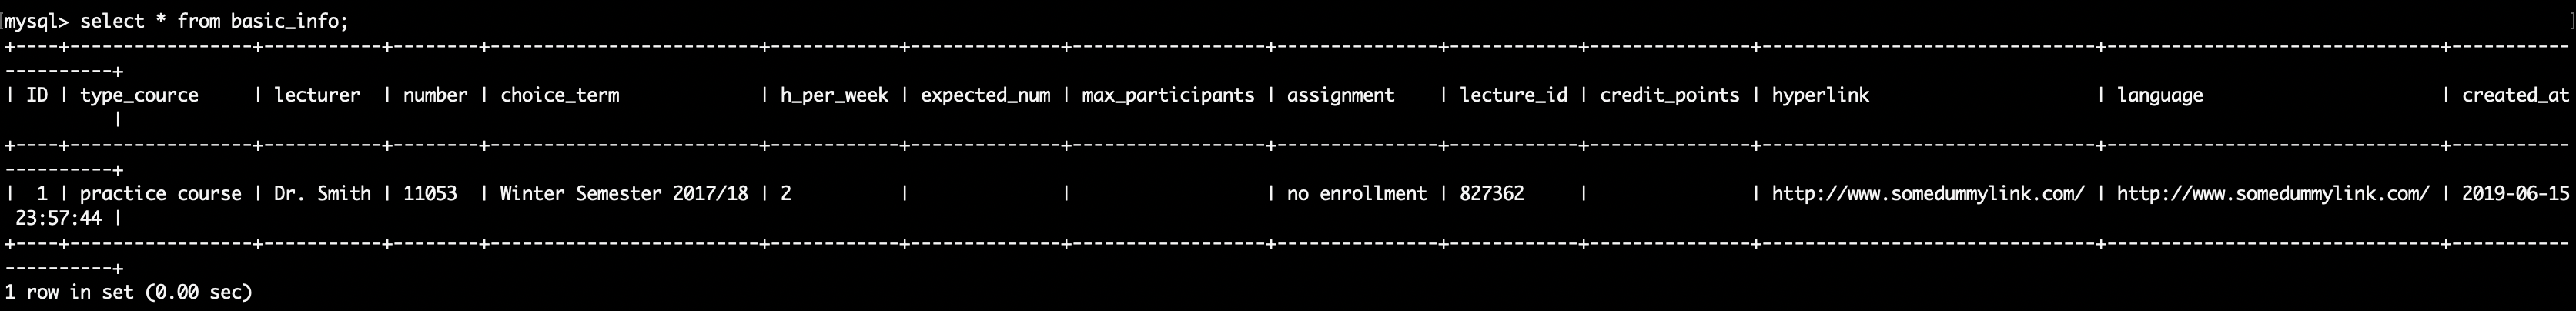

In [16]:
Image(filename='basic_info.png')

### Insert event_dates table

In [14]:
for table in dates_table:
    class_id=1001
    for row in table.select("tr"):
        class_id += 1
        # Get all cells inside the row
        cells = row.findAll("td")
        
        # Check if there is at least one td cell inside this row
        if(len(cells) > 0):
            # Get all the different data from td tag
            # Split cell into two different parts seperated by 'to' in order to have a Begin date and an End date in duration column
            duration = cells[0].text.split("to")
            start_date = duration[0].strip()
            end_date = duration[1].strip()
            day = cells[1].text.strip()
            # Split <td class="mod_n_odd"> into two different parts seperated by 'to' in order to have a start_time and end_time
            time = cells[2].text.split("to")
            start_time = time[0].strip()
            end_time = time[1].strip()
            # Parse <td class="mod_n_odd"> to frequency
            frequency = cells[3].text.strip()
            room = cells[4].text.strip()
            lecturer_date = cells[5].text.strip()
            status = cells[6].text.strip()
            remarks = cells[7].text.strip()
            cancelled_on = cells[8].text.strip()
            max_participants = cells[9].text.strip()
            sql = "insert into event_dates(class_id,start_date,end_date,day,start_time,end_time,frequency,room,lecturer_date,status,remarks,cancelled_on,max_participants) VALUES('{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}','{}')".format(class_id, start_date, end_date, day, start_time, end_time, frequency, room, lecturer_date, status, remarks, cancelled_on, max_participants)
            try:
                cursor.execute(sql)
                # Commit changes in the database
                conn.commit()
                print("OK, 1 row affected")
            except:
                print("You have an error in your SQL syntax")
                #Rollback in case there is any error
                conn.rollback()

# Disconnect 
conn.close()

OK, 1 row affected
OK, 1 row affected
OK, 1 row affected
OK, 1 row affected
OK, 1 row affected
OK, 1 row affected
OK, 1 row affected
OK, 1 row affected
OK, 1 row affected
OK, 1 row affected
OK, 1 row affected


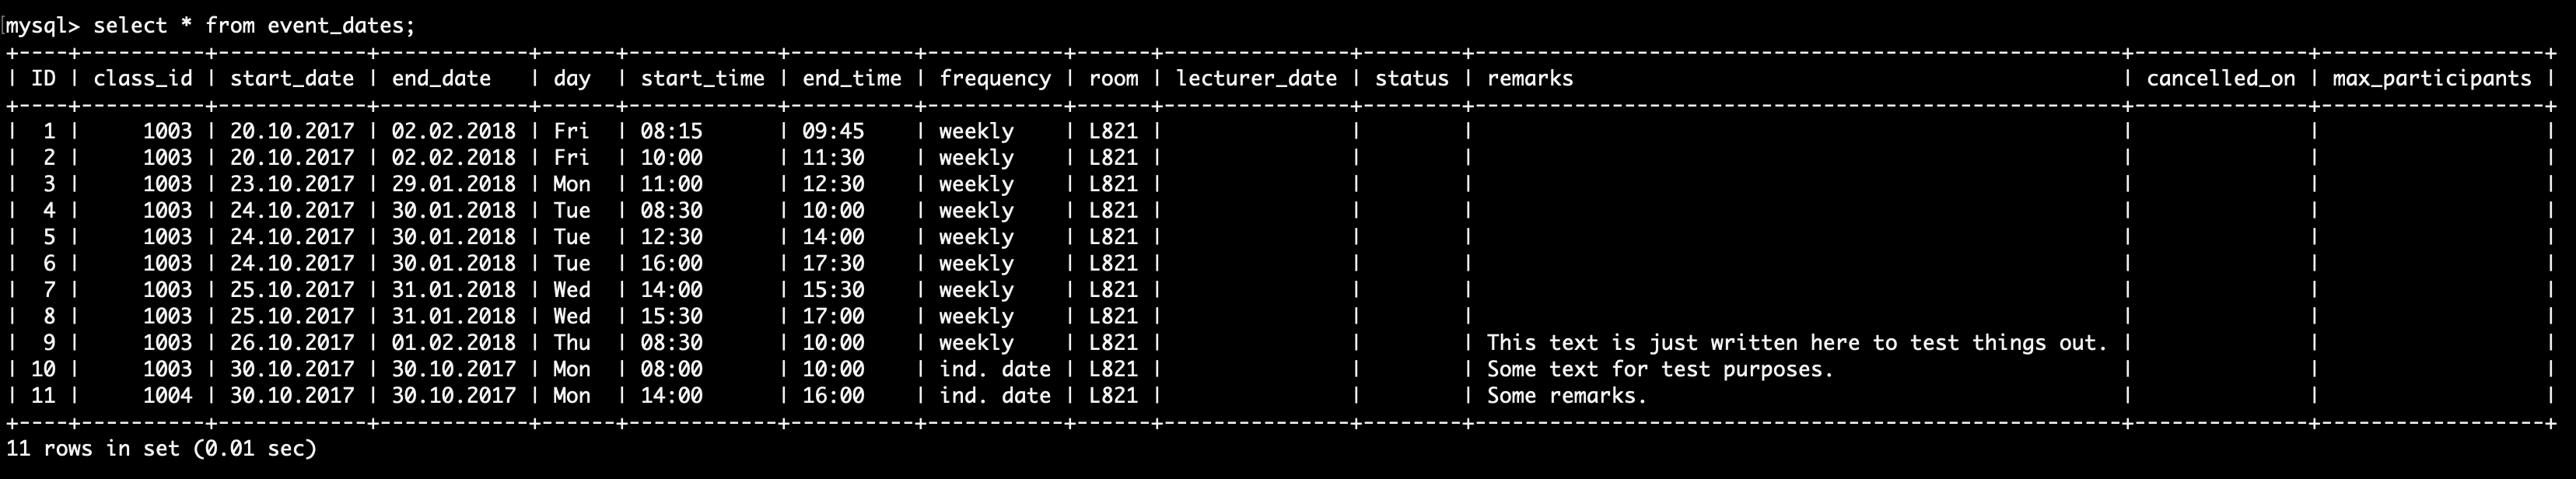

In [17]:
Image(filename='event_dates.png')

## 2. Convert data to DataFrame

In [176]:
conn = pymysql.connect(host='localhost', user='root', password='sebastion', db='stepbystep', charset='utf8')
cursor = conn.cursor()

In [177]:
# basic_info table

cursor.execute("use stepbystep;")
cursor.execute("select * from basic_info;")
data_basic_info = cursor.fetchall()
data_basic_info

# Naming columns
indexs = []
for i in range(len(cursor.description)):
    indexs.append(cursor.description[i][0])

df_basic_info = pd.DataFrame(
    data_basic_info[0],
    index = indexs
).T

df_basic_info

,ID,type_cource,lecturer,number,choice_term,h_per_week,expected_num,max_participants,assignment,lecture_id,credit_points,hyperlink,language,created_at
0,1,practice course,Dr. Smith,11053,Winter Semester 2017/18,2,,,no enrollment,827362,,http://www.somedummylink.com/,http://www.somedummylink.com/,2019-06-15 23:57:44


In [178]:
# event_dates table

cursor.execute("select * from event_dates limit 11;")

# For columns list
columns = []

data_event = [i for i in cursor]
df_event = pd.DataFrame(data_event)

# Naming columns
for i in range(len(cursor.description)):
    columns.append(cursor.description[i][0])

df_event.columns = columns
df_event

,ID,class_id,start_date,end_date,day,start_time,end_time,frequency,room,lecturer_date,status,remarks,cancelled_on,max_participants
0,1,1003,20.10.2017,02.02.2018,Fri,08:15,09:45,weekly,L821,,,,,
1,2,1003,20.10.2017,02.02.2018,Fri,10:00,11:30,weekly,L821,,,,,
2,3,1003,23.10.2017,29.01.2018,Mon,11:00,12:30,weekly,L821,,,,,
3,4,1003,24.10.2017,30.01.2018,Tue,08:30,10:00,weekly,L821,,,,,
4,5,1003,24.10.2017,30.01.2018,Tue,12:30,14:00,weekly,L821,,,,,
5,6,1003,24.10.2017,30.01.2018,Tue,16:00,17:30,weekly,L821,,,,,
6,7,1003,25.10.2017,31.01.2018,Wed,14:00,15:30,weekly,L821,,,,,
7,8,1003,25.10.2017,31.01.2018,Wed,15:30,17:00,weekly,L821,,,,,
8,9,1003,26.10.2017,01.02.2018,Thu,08:30,10:00,weekly,L821,,,This text is just written here to test things ...,,
9,10,1003,30.10.2017,30.10.2017,Mon,08:00,10:00,ind. date,L821,,,Some text for test purposes.,,


In [179]:
conn.close()